# Generation of capacity curves using DBELA
This notebook enables the user to generate capacity curves (in terms of spectral acceleration vs. spectral displacement) using the Displacement-based Earthquake Loss Assessment (DBELA) approach. The figure below illustrates various capacity curves generated using this approach.

<img src="../../../../figures/synthethic_capacity_curves.png" width="350" align="middle">


In [7]:
import DBELA
from rmtk.vulnerability.common import utils
%matplotlib inline

---
### Load geometric and material properties

Please specify below the paths for the input files containing the building model and damage model. These models need to be defined according to the format described in the [RMTK manual](../../../../../rmtk-docs.pdf).

In [8]:
building_model_file = "../../../../../rmtk_data/DBELA/bare_frames.csv"
damage_model_file = "../../../../../rmtk_data/damage_model_dbela_low_code.csv"

### Number of samples

The parameter `no_assets` below controls the number of building samples that will be generated:

In [9]:
no_assets = 100

### Generate the capacity curves

In [10]:
building_class_model = DBELA.read_building_class_model(building_model_file)
assets = DBELA.generate_assets(building_class_model, no_assets)
damage_model = utils.read_damage_model(damage_model_file)
capacity_curves = DBELA.generate_capacity_curves(assets, damage_model)

### Plot the capacity curves

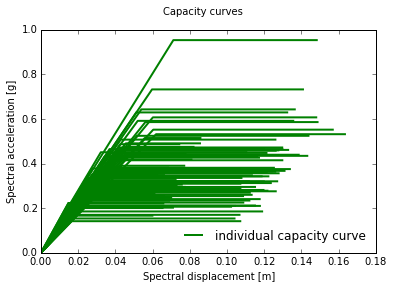

In [11]:
utils.plot_capacity_curves(capacity_curves)

####Adding additional information
Additional information can be added to the capacity curves generated using the above method. For instance, by setting appropriate values for the parameters `gamma` and `yielding_point_index` in the cell below, the `add_information` function can be used to include this data in the previously generated capacity curves.

In [12]:
gamma = 1.2
yielding_point_index = 1.0

In [13]:
capacity_curves = utils.add_information(capacity_curves, "gamma", "value", gamma)
capacity_curves = utils.add_information(capacity_curves, "yielding point", "point", yielding_point_index)

####Save capacity curves
Please specify below the path for the output file to save the capacity curves:

In [ ]:
output_file = "../../../../../rmtk_data/capacity_curves_dbela.csv"

In [14]:
utils.save_SdSa_capacity_curves(capacity_curves, output_file)